# Module 12 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [1]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
browser = Browser('chrome')

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [3]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser.visit(url)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [4]:
# Create a Beautiful Soup Object
html = browser.html
soup = BeautifulSoup(html, 'html.parser')

In [5]:
# Extract all rows of data of the table
table_rows_data = soup.find_all('table', class_='table')
table_rows_data

[<table class="table">
 <tbody><tr>
 <th>id</th>
 <th>terrestrial_date</th>
 <th>sol</th>
 <th>ls</th>
 <th>month</th>
 <th>min_temp</th>
 <th>pressure</th>
 </tr>
 <tr class="data-row">
 <td>2</td>
 <td>2012-08-16</td>
 <td>10</td>
 <td>155</td>
 <td>6</td>
 <td>-75.0</td>
 <td>739.0</td>
 </tr>
 <tr class="data-row">
 <td>13</td>
 <td>2012-08-17</td>
 <td>11</td>
 <td>156</td>
 <td>6</td>
 <td>-76.0</td>
 <td>740.0</td>
 </tr>
 <tr class="data-row">
 <td>24</td>
 <td>2012-08-18</td>
 <td>12</td>
 <td>156</td>
 <td>6</td>
 <td>-76.0</td>
 <td>741.0</td>
 </tr>
 <tr class="data-row">
 <td>35</td>
 <td>2012-08-19</td>
 <td>13</td>
 <td>157</td>
 <td>6</td>
 <td>-74.0</td>
 <td>732.0</td>
 </tr>
 <tr class="data-row">
 <td>46</td>
 <td>2012-08-20</td>
 <td>14</td>
 <td>157</td>
 <td>6</td>
 <td>-74.0</td>
 <td>740.0</td>
 </tr>
 <tr class="data-row">
 <td>57</td>
 <td>2012-08-21</td>
 <td>15</td>
 <td>158</td>
 <td>6</td>
 <td>-78.0</td>
 <td>740.0</td>
 </tr>
 <tr class="data-row">
 <td

### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [6]:
# Create an empty list
header_list = []
data_list = []

# Loop through the scraped data to create a list of rows

# Extract the header of the rows
headers = soup.find_all('th')
for header in headers:
    header = header.text
    header_list.append(header)

# Extract all the data of the rows
row_values = soup.find_all('tr', class_ = 'data-row')
for value in row_values:
    entries = value.find_all('td')
    data = []
    for entry in entries:
        data.append(entry.text)
    data_list.append(data)

In [7]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
data_df = pd.DataFrame(data_list, columns = header_list)

In [8]:
# Confirm DataFrame was created successfully
data_df.head()

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [9]:
# Examine data type of each column
data_df.dtypes

id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object

In [10]:
# Change data types for data analysis

# Convert 'terrestrial_date' to datetime format by using .to_datetime
data_df['terrestrial_date'] = pd.to_datetime(data_df['terrestrial_date'], dayfirst=True, format='%Y-%m-%d')

# Using .astype to change types for another variables
data_df = data_df.astype({
    'sol':'int64',
    'ls':'int64',
    'month':'int64',
    'min_temp':'float',
    'pressure':'float'
})

In [11]:
# Confirm type changes were successful by examining data types again
data_df.dtypes

id                          object
terrestrial_date    datetime64[ns]
sol                          int64
ls                           int64
month                        int64
min_temp                   float64
pressure                   float64
dtype: object

### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [12]:
# 1. How many months are there on Mars?
months = data_df['month'].value_counts().sort_index()
print(f"There are {len(months)} months exist on Mars.")

for month, count in months.items():
    print(f"{month} has {count} entries")
#print(months)

There are 12 months exist on Mars.
1 has 174 entries
2 has 178 entries
3 has 192 entries
4 has 194 entries
5 has 149 entries
6 has 147 entries
7 has 142 entries
8 has 141 entries
9 has 134 entries
10 has 112 entries
11 has 138 entries
12 has 166 entries


In [13]:
# 2. How many Martian days' worth of data are there?
Martian_days = data_df['sol'].count()
Martian_days
print(f"There are {Martian_days} Martian days worth of data exist in the scraped dataset")

There are 1867 Martian days worth of data exist in the scraped dataset


In [14]:
# 3. What is the average low temperature by month?
average_low_temperature_by_month = data_df.groupby(data_df['month'])['min_temp'].mean()


# Find the coldest month
coldest_month = average_low_temperature_by_month.idxmin()
coldest_month_temp = average_low_temperature_by_month.min()

# Find the hottest month
hottest_month = average_low_temperature_by_month.idxmax()
hottest_month_temp = average_low_temperature_by_month.max()

print(average_low_temperature_by_month)
print(f"************************************************")
print(f"On average, the coldest month on Mars is the {coldest_month}-month with the lowest temperature is {round(coldest_month_temp,6)} in Celcius")
print(f"And, the warmest month on Mars is the {hottest_month}-month with the warmest temperature is {round(hottest_month_temp,6)} in Celcius")

month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: min_temp, dtype: float64
************************************************
On average, the coldest month on Mars is the 3-month with the lowest temperature is -83.307292 in Celcius
And, the warmest month on Mars is the 8-month with the warmest temperature is -68.382979 in Celcius


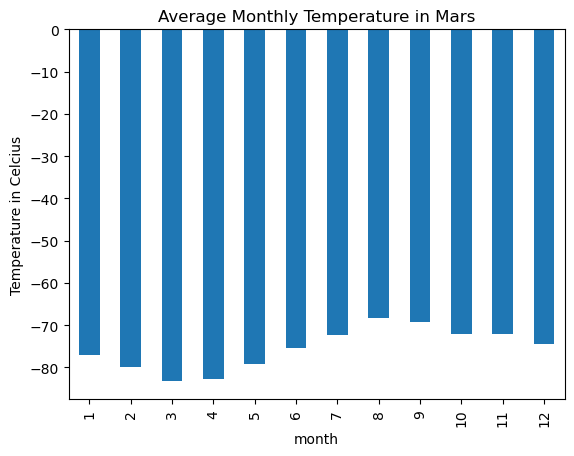

In [15]:
# Plot the average temperature by month
average_low_temperature_by_month.plot(kind='bar')
plt.title('Average Monthly Temperature in Mars')
plt.xlabel('month')
plt.ylabel('Temperature in Celcius')
plt.show()

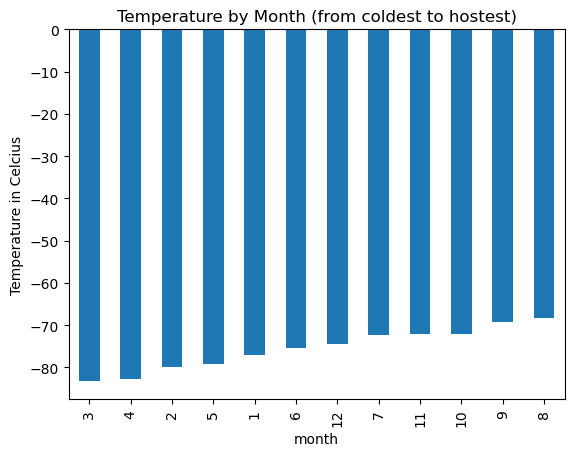

In [16]:
# Identify the coldest and hottest months in Curiosity's location
data_df_sorted = data_df.groupby(data_df['month'])['min_temp'].mean().sort_values()
data_df_sorted

# Plot the temperature by month, from coldest to hostest
data_df_sorted.plot(kind='bar')
plt.title('Temperature by Month (from coldest to hostest)')
plt.xlabel('month')
plt.ylabel('Temperature in Celcius')
plt.show()

In [17]:
# 4. Average pressure by Martian month
average_pressure_by_Martian_month = data_df.groupby(data_df['month'])['pressure'].mean()
lowest_pressure = average_pressure_by_Martian_month.idxmin()
highest_pressure = average_pressure_by_Martian_month.idxmax()

print(average_pressure_by_Martian_month)
print(f"On average, the atmospheric pressure on Mars is lowest in the {lowest_pressure}-month and highest in the {highest_pressure}-month")

month
1     862.488506
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
10    887.312500
11    857.014493
12    842.156627
Name: pressure, dtype: float64
On average, the atmospheric pressure on Mars is lowest in the 6-month and highest in the 9-month


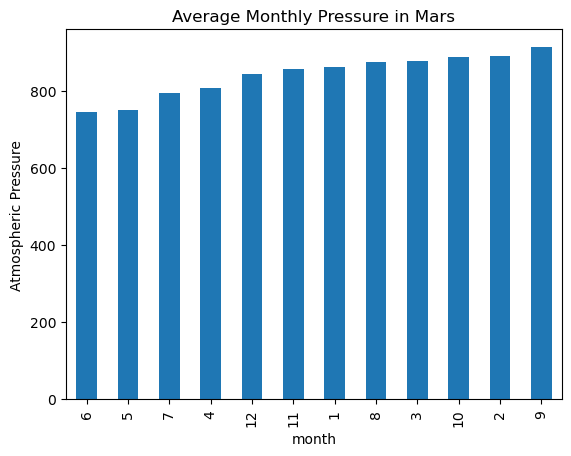

In [18]:
# Plot the average pressure by month, from low to high
average_pressure_by_Martian_month_sorted = data_df.groupby(data_df['month'])['pressure'].mean().sort_values()

average_pressure_by_Martian_month_sorted.plot(kind='bar')
plt.title('Average Monthly Pressure in Mars')
plt.xlabel('month')
plt.ylabel('Atmospheric Pressure')
plt.show()

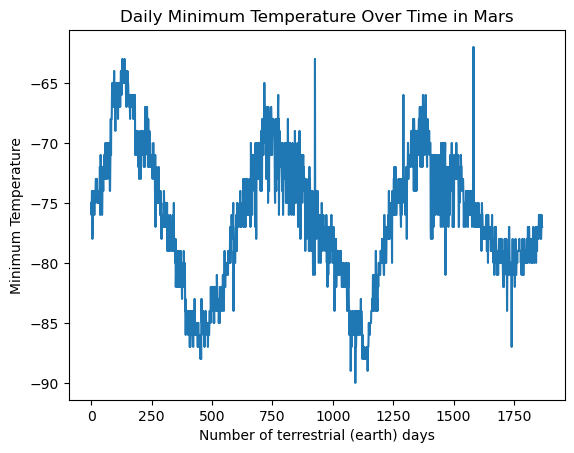

In [19]:
# 5. How many terrestrial (earth) days are there in a Martian year?

data_df['min_temp'].plot()
plt.title('Daily Minimum Temperature Over Time in Mars')
plt.xlabel('Number of terrestrial (earth) days')
plt.ylabel('Minimum Temperature')
plt.show()

In [20]:
# Solar longitude
data_df[data_df['ls']==0]

,id,terrestrial_date,sol,ls,month,min_temp,pressure
304,320,2013-08-01,351,0,1,-75.0,853.0
305,319,2013-08-02,352,0,1,-77.0,854.0
925,954,2015-06-19,1019,0,1,-81.0,849.0
926,938,2015-06-20,1020,0,1,-63.0,832.0
1579,1606,2017-05-06,1688,0,1,-76.0,840.0
1580,1610,2017-05-07,1689,0,1,-75.0,840.0


In [21]:
# In order to find the terrestrial (earth) day on Mars, we need to get the distance from peak to peak of solar longitude
# so, I chose the peak from 2013-08-01 to 2015-06-19
terrestrial_days = pd.Timestamp('2013-08-01') - pd.Timestamp('2015-06-19')
print(f"There are {terrestrial_days} (terrestrial days) in a Martian year")

There are -687 days +00:00:00 (terrestrial days) in a Martian year


On average, the third month has the coldest minimum temperature on Mars, and the eighth month is the warmest. But it is always very cold there in human terms!



Atmospheric pressure is, on average, lowest in the sixth month and highest in the ninth.

The distance from peak to peak is roughly 1425-750, or 675 days. A year on Mars appears to be about 675 days from the plot. Internet search confirms that a Mars year is equivalent to 687 earth days.

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [22]:
# Write the data to a CSV
data_df.to_csv('Mars_Temperature_Data_CSV')

In [23]:
browser.quit()